PV Array geometry introduction
==========================

In this section, we will learn how to:

- create a 2D PV array geometry with PV rows at identical heights, tilt angles, and with identical widths
- plot that PV array
- calculate the inter-row direct shading, and get the length of the shadow on the pv rows

Imports and settings

In [1]:
# Import external libraries
import matplotlib.pyplot as plt

# Settings
% matplotlib inline

### Prepare PV array parameters

In [2]:
pvarray_parameters = {
    'n_pvrows': 4,            # number of pv rows
    'pvrow_height': 1,        # height of pvrows (measured at center / torque tube)
    'pvrow_width': 1,         # width of pvrows
    'axis_azimuth': 0.,       # azimuth angle of rotation axis
    'surface_tilt': 20.,      # tilt of the pv rows
    'surface_azimuth': 90.,   # azimuth of the pv rows front surface
    'solar_zenith': 40.,      # solar zenith angle
    'solar_azimuth': 150.,    # solar azimuth angle
    'gcr': 0.5,               # ground coverage ratio
}

### Create a PV array and its shadows

Import the ``OrderedPVArray`` class and create a PV array object using the parameters above

In [3]:
from pvfactors.geometry import OrderedPVArray

pvarray = OrderedPVArray.from_dict(pvarray_parameters)

Plot the PV array

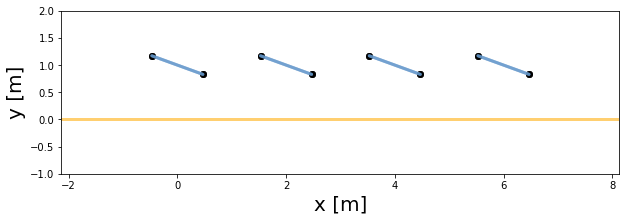

In [4]:
# Plot pvarray shapely geometries
f, ax = plt.subplots(figsize=(10, 3))
pvarray.plot(ax)
plt.show()

As we can see, there are no shadows on the ground. That's because users need to cast them manually.

In [5]:
pvarray.cast_shadows()

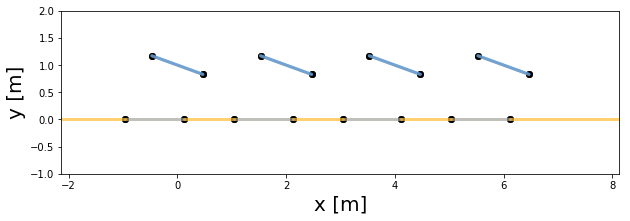

In [6]:
# Plot pvarray shapely geometries
f, ax = plt.subplots(figsize=(10, 3))
pvarray.plot(ax)
plt.show()

Now we can see the shadows on the ground, casted by PV rows due to the sun.

### Situation with direct shading

We can also create situations where direct shading happens either on the front or back surface of the PV rows.

In [7]:
# New configuration with direct shading
pvarray_parameters.update({'surface_tilt': 80., 'solar_zenith': 75., 'solar_azimuth': 90.})

In [8]:
pvarray_parameters

{'axis_azimuth': 0.0,
 'gcr': 0.5,
 'n_pvrows': 4,
 'pvrow_height': 1,
 'pvrow_width': 1,
 'solar_azimuth': 90.0,
 'solar_zenith': 75.0,
 'surface_azimuth': 90.0,
 'surface_tilt': 80.0}

In [9]:
# Create new PV array
pvarray_w_direct_shading = OrderedPVArray.from_dict(pvarray_parameters)
# Cast shadows
pvarray_w_direct_shading.cast_shadows()

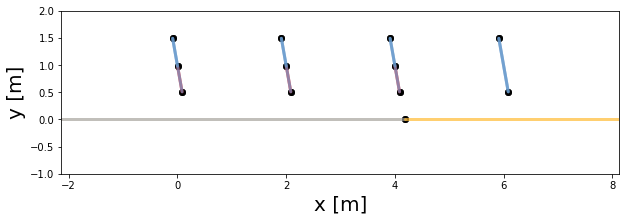

In [10]:
# Plot pvarray shapely geometries
f, ax = plt.subplots(figsize=(10, 3))
pvarray_w_direct_shading.plot(ax)
plt.show()

We can now see on the plot above that some inter-row shading is happening in the PV array.
It is very easy to obtain the shadow length on the front surface of the shaded PV rows.

In [11]:
# Shaded length on first pv row (leftmost)
l = pvarray_w_direct_shading.pvrows[0].front.shaded_length
print("Shaded length on front surface of leftmost PV row: {}. m".format(l))

Shaded length on front surface of leftmost PV row: 0.480384616384. m


In [12]:
# Shaded length on last pv row (rightmost)
l = pvarray_w_direct_shading.pvrows[-1].front.shaded_length
print("Shaded length on front surface of rightmost PV row: {}. m".format(l))

Shaded length on front surface of rightmost PV row: 0.0. m


As we can see, the rightmost PV row is not shaded at all.